### Importando as Bibliotecas

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Importando o Dataset

In [2]:
df = pd.read_csv('listings.csv', usecols = ['room_type', 'price'])

In [3]:
df.head()

,room_type,price
0,Private room,59
1,Private room,106
2,Private room,135
3,Private room,75
4,Private room,55


In [4]:
df

,room_type,price
0,Private room,59
1,Private room,106
2,Private room,135
3,Private room,75
4,Private room,55
...,...,...
5592,Entire home/apt,128
5593,Entire home/apt,100
5594,Entire home/apt,400
5595,Entire home/apt,60


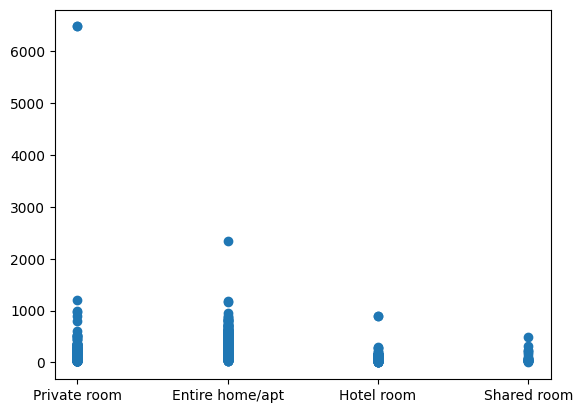

In [5]:
plt.scatter(df.room_type, df.price)
plt.show()

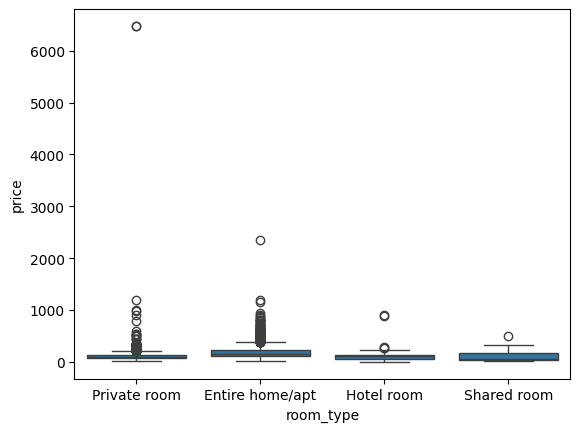

In [6]:
sns.boxplot(y = 'price', x = 'room_type', data = df)
plt.show()

In [7]:
def remove_outlier(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQ = Q3 - Q1
    LI = df < (Q1 - 1.5*IQ)
    LS = df > (Q3 + 1.5*IQ)
    
    df_final = df[~(LI | LS)]
    return df_final

In [8]:
df_removido = remove_outlier(df.price)
df_removido = pd.DataFrame(df_removido)


In [9]:
ind_dif = df.index.difference(df_removido.index)

In [10]:
ind_dif

Index([  38,   44,   52,   60,   86,  106,  113,  124,  148,  149,
       ...
       5423, 5430, 5431, 5432, 5460, 5489, 5511, 5515, 5516, 5594],
      dtype='int64', length=259)

In [20]:
# Cria um Series booleano: True para os índices que DEVEM ser MANTIDOS, e False para os que devem ser descartados.
# .index.isin(ind_dif) retorna True para os índices que estão na lista 'ind_dif'.
# O til (~) inverte isso, fazendo com que ele selecione TUDO que NÃO está em 'ind_dif'.
df_final = df[~df.index.isin(ind_dif)]

In [21]:
df_final

,room_type,price
0,Private room,59.0
1,Private room,106.0
2,Private room,135.0
3,Private room,75.0
4,Private room,55.0
...,...,...
5591,Entire home/apt,52.0
5592,Entire home/apt,128.0
5593,Entire home/apt,100.0
5595,Entire home/apt,60.0


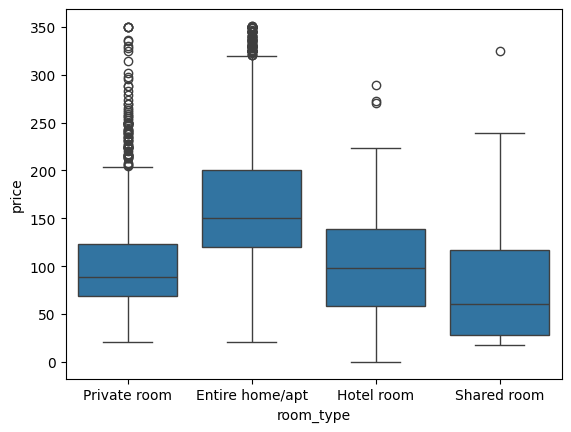

In [22]:
sns.boxplot(y = 'price', x = 'room_type', data = df)
plt.show()